## Group Members:
- Shishir Aryal
- Dejina Ghale

## Data Source:
www.kaggle.com/datasets/omkarsabnis/yelp-reviews-dataset

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install vaderSentiment


In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

C:\Users\aryal\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Loading the Yelp dataset from the local machine so I can start analyzing it
df = pd.read_csv(r"C:\Users\aryal\Desktop\AI\Semester 2\AI Infratructure & Architecture\Assignment 4\yelp.csv")

# Displaying the first few rows to get an initial look at the structure and content
print("Previewing the dataset:")
print(df.head())

# Checking for any missing values before starting sentiment analysis
# (making sure we’re not dealing with empty or incomplete data)
print("\nChecking for missing values:")
print(df.isnull().sum())

# Initializing the VADER sentiment analyzer to start scoring the review texts
analyzer = SentimentIntensityAnalyzer()

# Defining a function for classifying the sentiment based on compound score
# (Using thresholds defined by VADER to assign sentiment labels)
def vader_sentiment(text):
    score = analyzer.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Applying the sentiment function to each review text in the dataset
df['sentiment'] = df['text'].apply(vader_sentiment)

# Displaying a sample of the dataset after assigning sentiment labels
print("\nSample with VADER-based sentiment labels:")
print(df[['text', 'sentiment']].head())


Previewing the dataset:
              business_id       date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  1/26/2011  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  7/27/2011  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  6/14/2012  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  5/27/2010  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw   1/5/2012  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh

In [5]:
# Basic text preprocessing: removing special characters and converting to lowercase
df['cleaned_review'] = df['text'].str.replace('[^a-zA-Z\s]', '', regex=True).str.lower()

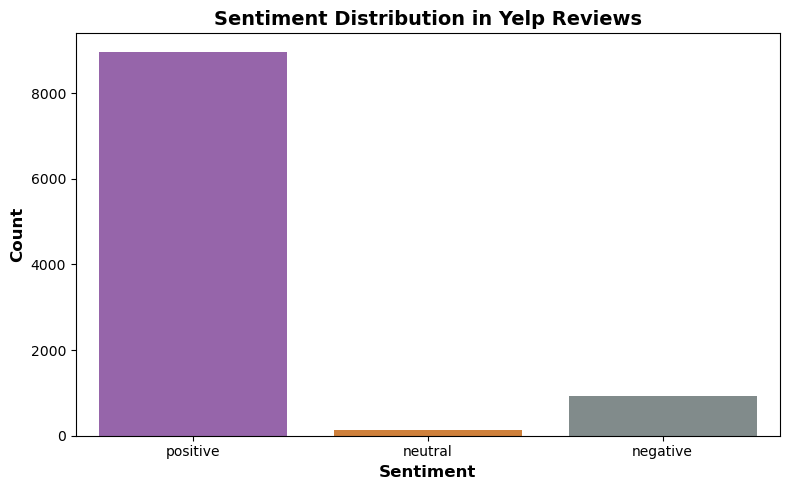

In [6]:
# Step 6: Plotting the distribution of sentiments using a colored count plot
# (Just to see how the reviews are spread sentiment-wise)
custom_palette = {'positive': '#9B59B6', 'neutral': '#E67E22', 'negative': '#7F8C8D'}  # Purple, Orange, Gray

plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette=custom_palette, order=['positive', 'neutral', 'negative'])
plt.title("Sentiment Distribution in Yelp Reviews", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

In [7]:
# Step 1: Separating the input features (review texts) and target labels (sentiment)
# (Using cleaned text data for better vectorization results)
X = df['cleaned_review']
y = df['sentiment']

# Step 2: Splitting the dataset into training and testing sets (80% for training, 20% for testing)
# (Fixing random_state so results are reproducible every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Converting the review texts into TF-IDF vectors (numerical format)
# (This helps the model understand the importance of each word in the review)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Step 4: Balancing the training dataset using SMOTE (Synthetic Minority Over-sampling Technique)
# (Doing this to handle class imbalance and avoid biased predictions)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

# Step 5: Training a Naive Bayes classifier using the balanced training data
# (This model is known to work well with text classification tasks)
model = MultinomialNB()
model.fit(X_train_balanced, y_train_balanced)

# Step 6: Making predictions on the test data
y_pred = model.predict(X_test_tfidf)

# Step 7: Evaluating the model’s performance using accuracy and classification report
# (This gives us insight into how well our model is doing on unseen data)
accuracy = accuracy_score(y_test, y_pred)
print(f' Accuracy: {accuracy*100:.2f}%')

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

 Accuracy: 84.55%

 Classification Report:
              precision    recall  f1-score   support

    negative       0.34      0.63      0.44       177
     neutral       0.15      0.07      0.09        30
    positive       0.95      0.88      0.91      1793

    accuracy                           0.85      2000
   macro avg       0.48      0.52      0.48      2000
weighted avg       0.88      0.85      0.86      2000



In [8]:
import re

# Replacing basic vectorizer with an improved one by including bigrams and ignoring stopwords
# (Doing this to help capture context like "not good" or "very bad" and remove common filler words)
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english', max_features=7000)

# Re-transforming training and testing data using the improved vectorizer
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

#  Re-training the Naive Bayes model using the improved features
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

#  Defining a new function to predict sentiment using the trained model
# (This is useful for testing how the model reacts to new custom inputs)
def predict_sentiment(text):
    # Cleaning the review by removing unwanted characters and lowercasing it
    cleaned = re.sub('[^a-zA-Z\s]', '', text).lower()

    # Converting the cleaned review into vector form using updated TF-IDF
    vectorized = vectorizer.transform([cleaned])

    # Using the trained model to get the predicted sentiment
    prediction = model.predict(vectorized)[0]

    # Returning the final sentiment label (positive, negative, or neutral)
    return prediction

# Testing the updated function with a sample review
sample_review = "I love this place. It's awesome."
print("Sample review:", sample_review)
print("Predicted sentiment:", predict_sentiment(sample_review))


Sample review: I love this place. It's awesome.
Predicted sentiment: positive


In [15]:
# Function to predict sentiment of new text input
def predict_sentiment(text):
    cleaned = re.sub('[^a-zA-Z\s]', '', text).lower()
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)[0]
    return prediction

In [10]:
# For interactive testing
while True:
    user_input = input("Enter a review (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    print("Predicted sentiment:", predict_sentiment(user_input))


Enter a review (or type 'exit' to quit): "The food was delicious and the service was excellent. Highly recommend this place!"
Predicted sentiment: positive
Enter a review (or type 'exit' to quit): I love this place i will come back again.
Predicted sentiment: positive
Enter a review (or type 'exit' to quit): exit


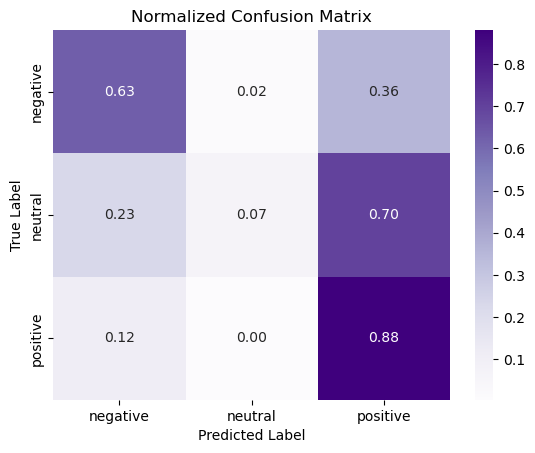

In [12]:
# Normalized Confusion Matrix
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix_norm, annot=True, fmt='.2f', cmap='Purples',
            xticklabels=['negative', 'neutral', 'positive'],
            yticklabels=['negative', 'neutral', 'positive'])
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


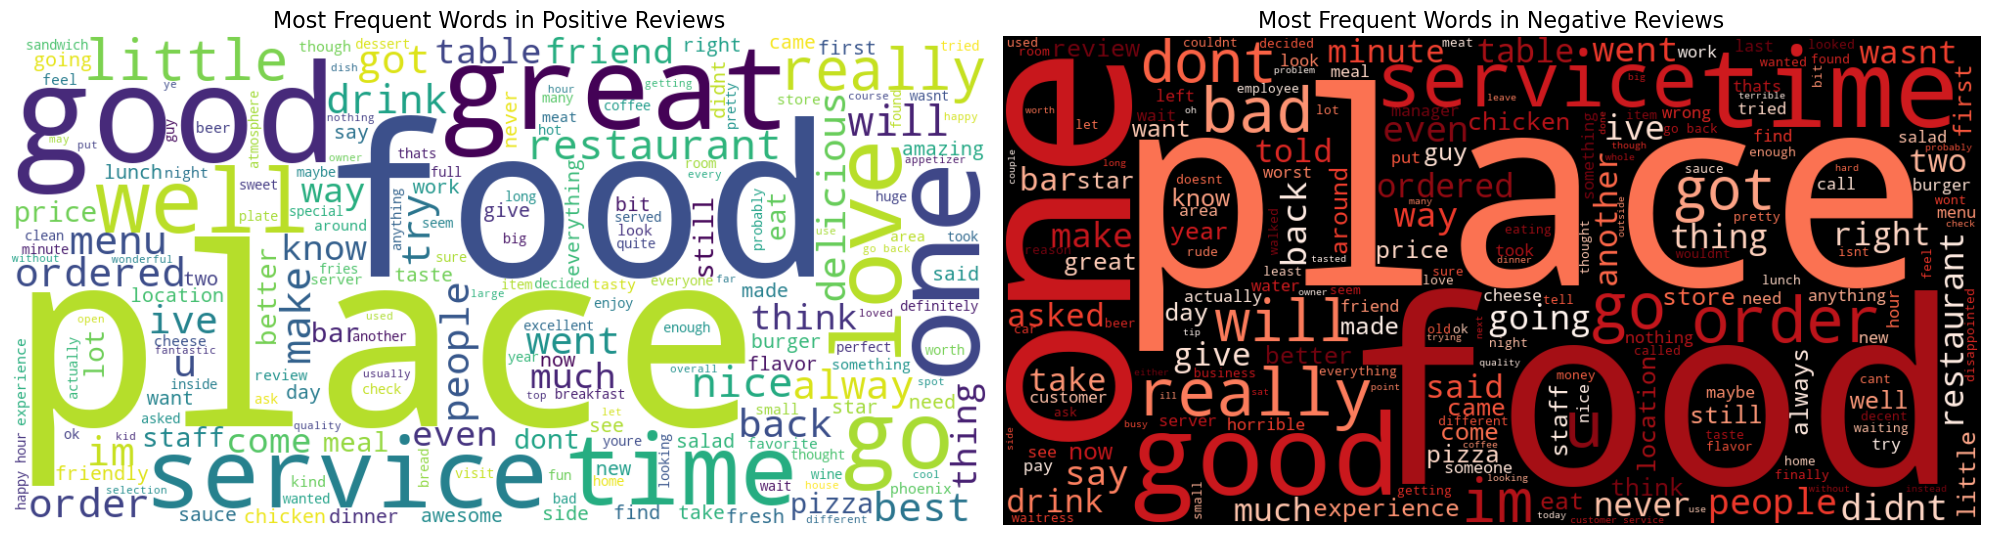

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Collecting all positive review texts into a single string for word cloud generation
positive_text = ' '.join(df[df['sentiment'] == 'positive']['cleaned_review'])

# Doing the same for negative reviews by filtering and joining
negative_text = ' '.join(df[df['sentiment'] == 'negative']['cleaned_review'])

# Creating a large side-by-side figure to compare both sentiment types clearly
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Giving more width for better visual clarity

# Generating a word cloud by collecting all positive review words together
# and displaying them using a clean white background
wordcloud_pos = WordCloud(width=1000, height=500, background_color='white').generate(positive_text)
axes[0].imshow(wordcloud_pos, interpolation='bilinear')  # Rendering the word cloud smoothly
axes[0].axis("off")  # Hiding axes to keep the focus on the words
axes[0].set_title("Most Frequent Words in Positive Reviews", fontsize=16)

# Doing the same for negative reviews, but switching to black background
# and using red shades to emphasize negativity
wordcloud_neg = WordCloud(width=1000, height=500, background_color='black', colormap='Reds').generate(negative_text)
axes[1].imshow(wordcloud_neg, interpolation='bilinear')  # Plotting the cloud for negative sentiment
axes[1].axis("off")  # Removing axis lines to make it cleaner
axes[1].set_title("Most Frequent Words in Negative Reviews", fontsize=16)

# Adjusting spacing to avoid overlapping and ensure it looks neat
plt.tight_layout()
plt.show()


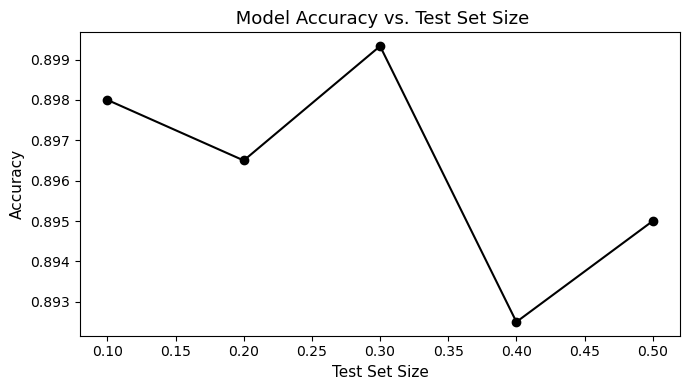

In [19]:
# Trying out different test set sizes to see how they affect model accuracy
test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]
accuracies = []

# Looping through each test size and training the model from scratch
for ts in test_sizes:
    # Splitting the dataset into train and test based on current test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

    # Transforming the text reviews into TF-IDF vectors
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)

    # Fitting a Naive Bayes model on the training data
    model = MultinomialNB()
    model.fit(X_train_tfidf, y_train)

    # Predicting the sentiment on test data and storing the accuracy
    y_pred = model.predict(X_test_tfidf)
    accuracies.append(accuracy_score(y_test, y_pred))

# Plotting the results using a bar chart for better visual comparison
plt.figure(figsize=(7, 4))
plt.plot(test_sizes, accuracies, marker='o', linestyle='-', color='black')
plt.xlabel("Test Set Size", fontsize=11)
plt.ylabel("Accuracy", fontsize=11)
plt.title(" Model Accuracy vs. Test Set Size", fontsize=13)
plt.tight_layout()
plt.show()
